<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/Day09_Ch12(PCA%26Clustering)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고객 데이터에서 숨겨진 패턴 찾기: PCA와 클러스터링

지난 시간, 우리는 통계분석의 다양한 방법들을 배웠습니다. 특히, 변수가 많은 고차원 데이터는 해석하기 어렵고, 분석 모델의 성능을 저하시키는 '차원의 저주' 문제가 발생할 수 있다는 점을 확인했습니다. 또한, 정답이 없는 데이터 속에서 숨겨진 구조나 그룹을 찾아내는 비지도 학습의 중요성도 배웠습니다.

오늘은 **주성분 분석(PCA)**을 이용해 복잡한 고객 데이터를 핵심 정보만 남기고 차원을 축소하고, **K-평균(K-Means) 군집분석**을 통해 고객들을 의미 있는 그룹으로 나누는 과정을 직접 코드로 구현합니다. 데이터의 숨겨진 인사이트를 발견하고, 이를 바탕으로 비즈니스 의사결정을 내리는 데이터 분석가의 핵심 역량을 체험하게 될 것입니다.

**🎯 프로젝트 목표:**

1.  **차원 축소의 이해**: '차원의 저주'가 무엇인지 이해하고, **주성분 분석(PCA)**을 통해 고차원 데이터를 시각화 및 분석이 용이한 저차원 데이터로 변환합니다.
2.  **주성분 해석**: PCA로 생성된 새로운 축(주성분)이 원래 데이터의 어떤 특성을 요약하는지 **주성분 부하량(Loadings)**을 통해 해석하는 능력을 기릅니다.
3.  **군집분석 적용**: 정답 없는 데이터에서 자연스러운 그룹을 찾아내는 **K-평균(K-Means) 군집분석**의 원리를 이해하고, 최적의 군집 개수(k)를 찾는 **엘보우 방법(Elbow Method)**을 적용합니다.
4.  **인사이트 도출 및 의사결정**: 차원 축소와 군집분석 결과를 종합하여 각 고객 그룹의 특징(페르소나)을 정의하고, 실제 비즈니스에 적용할 수 있는 마케팅 전략을 제안합니다.


## 🔬 실습 진행 안내

오늘 실습은 다음 순서로 진행됩니다. 각 단계의 목표를 명확히 인지하고 참여해 주세요.

1.  **개인 학습 (Individual Work):**

    - 먼저 **문제 1부터 4까지 모든 문제를 개인적으로** 풀어봅니다. 코드의 빈칸을 채우고, 각 문제의 핵심 개념과 '생각해 볼 문제'에 대한 자신의 답을 정리합니다.
    - 문제들이 서로 연결되어 있으므로(예: 문제 1의 결과는 문제 3에서 사용), 반드시 순서대로 모든 문제를 풀어야 합니다.

2.  **팀별 심화 및 발표 준비 (Team Deep-dive & Preparation):**

    - 각 팀은 **지정된 문제 하나**를 맡아 해당 문제의 '전문가'가 됩니다.
    - 개인적으로 풀었던 내용을 바탕으로, 팀원들과 함께 맡은 문제의 핵심 개념, 소스 코드, 생각해 볼 문제에 대한 답을 더 깊이 있게 토론하고 정리합니다.
    - 각 문제의 마지막에 있는 **'[발표 과제]'** 가이드를 참고하여 발표를 준비합니다.

3.  **팀별 발표 (Team Presentation):**
    - 각 팀은 맡은 문제에 대해 다른 모든 학생들을 가르쳐준다는 생각으로 발표를 진행합니다.
    - 문제의 배경, 핵심 개념, 코드 실행 과정, 결과 해석, 그리고 '생각해 볼 문제'에 대한 팀의 결론을 명확하게 전달해야 합니다.


## 📖 시작하기 전: 핵심 용어 사전

오늘 실습에서 계속 마주칠 핵심 용어들입니다. '이런 게 있구나' 정도로 가볍게 읽고 넘어가세요. 실습을 진행하며 각 용어의 의미가 더 명확해질 것입니다.

- **차원(Dimension):** 데이터가 가진 변수(피처)의 개수. (예: 고객 데이터에 '나이', '소득', '방문 빈도'가 있다면 3차원 데이터)
- **차원의 저주(Curse of Dimensionality):** 차원이 증가할수록 데이터 분석 및 모델링에 필요한 데이터 양이 기하급수적으로 증가하고, 데이터 간의 거리 측정이 어려워지는 현상.
- **주성분 분석(PCA):** 여러 변수 간에 존재하는 상관관계를 이용해, 데이터의 분산(정보)을 가장 잘 설명하는 새로운 축(주성분)들을 찾아 기존 데이터를 요약/축소하는 기법.
- **주성분(Principal Component):** PCA를 통해 생성된 새로운 변수. 첫 번째 주성분(PC1)이 데이터의 분산을 가장 많이 설명하며, 각 주성분은 서로 직교(독립)합니다.
- **기여율(Explained Variance Ratio):** 각 주성분이 전체 데이터 분산의 몇 %를 설명하는지를 나타내는 지표.
- **군집분석(Clustering):** 데이터의 유사성을 기반으로 전체 데이터를 몇 개의 그룹(군집)으로 나누는 비지도 학습 방법.
- **K-평균(K-Means):** 분석가가 지정한 k개의 중심점(centroid)을 기준으로, 각 데이터 포인트를 가장 가까운 중심점에 할당하는 과정을 반복하여 군집을 형성하는 알고리즘.
- **엘보우 방법(Elbow Method):** K-평균 군집분석에서 군집의 개수(k)를 늘려가면서, 각 군집 내 데이터들의 응집도(inertia) 변화를 그래프로 그려 최적의 k를 찾는 방법.


## 사전 준비: 라이브러리 및 데이터 로드

오늘은 데이터 분석을 위한 `pandas`, `numpy`, 시각화를 위한 `matplotlib`, `seaborn`, 그리고 머신러닝을 위한 `scikit-learn` 라이브러리를 사용합니다.


In [1]:
# 필요 라이브러리 설치
# !pip install scikit-learn seaborn

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,754 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

In [2]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 한글 폰트 설정 (Mac 사용자는 'AppleGothic', Windows 사용자는 'Malgun Gothic' 등)
plt.rc('font', family='NanumGothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 실습용 데이터 생성
np.random.seed(42)
data = pd.DataFrame({
    '연간소득': np.random.normal(5000, 1500, 200).astype(int),
    '소비점수': np.random.randint(1, 101, 200),
    '방문빈도': np.random.randint(1, 101, 200),
    '체류시간': np.random.normal(60, 20, 200).astype(int)
})
print("데이터 생성 완료!")
data.head()

데이터 생성 완료!


,연간소득,소비점수,방문빈도,체류시간
0,5745,2,37,57
1,4792,90,12,84
2,5971,17,55,28
3,7284,33,13,48
4,4648,9,23,60


---

## 🚀 프로젝트 시나리오: "쇼핑몰 고객, 어떻게 그룹화할까?"

우리 팀은 쇼핑몰 고객 데이터를 확보했습니다. 데이터에는 고객의 **'연간소득', '소비점수(1~100점)', '월평균 방문빈도', '평균 체류시간(분)'** 이라는 4가지 변수가 있습니다. 이 4차원 데이터를 이용해 고객들을 비슷한 그룹으로 묶고, 각 그룹의 특성에 맞는 맞춤형 마케팅 전략을 세우고자 합니다.

하지만 4개의 변수를 한 번에 고려하여 고객을 나누는 것은 직관적이지 않고 어렵습니다. 과연 우리는 이 복잡한 데이터를 효과적으로 요약하고, 그 안에 숨겨진 고객 그룹들을 찾아낼 수 있을까요?


## 문제 1 (난이도: 하): 데이터 탐색과 차원 축소의 필요성 이해하기

> **🎯 목표:** 고차원 데이터의 시각적 탐색 한계를 확인하고, PCA를 적용하기 위한 데이터 전처리(스케일링)와 차원 축소를 수행합니다.


### 💡 핵심 개념:

**주성분 분석(PCA)**은 변수의 스케일에 민감합니다. 예를 들어 '연간소득'처럼 값의 범위가 큰 변수가 다른 변수들(예: '소비점수')보다 분석에 더 큰 영향을 미칠 수 있습니다. 이를 방지하기 위해, PCA 적용 전에 각 변수의 평균을 0, 분산을 1로 맞추는 **표준화(Standardization)** 과정을 거치는 것이 일반적입니다. `StandardScaler`가 이 역할을 수행합니다.


### 📌 수행 과제:

1.  `seaborn`의 `pairplot`을 이용해 4개 변수 간의 관계를 시각화하고, 이로부터 고객 그룹을 직관적으로 파악하기 어려운 이유를 생각해봅니다.
2.  `StandardScaler`를 사용하여 데이터를 표준화합니다.
3.  `PCA` 모델을 `n_components=2`로 설정하여 4차원 데이터를 2차원으로 축소합니다.
4.  축소된 2차원 데이터를 산점도(scatter plot)로 시각화하여 데이터가 어떻게 분포하는지 확인합니다.


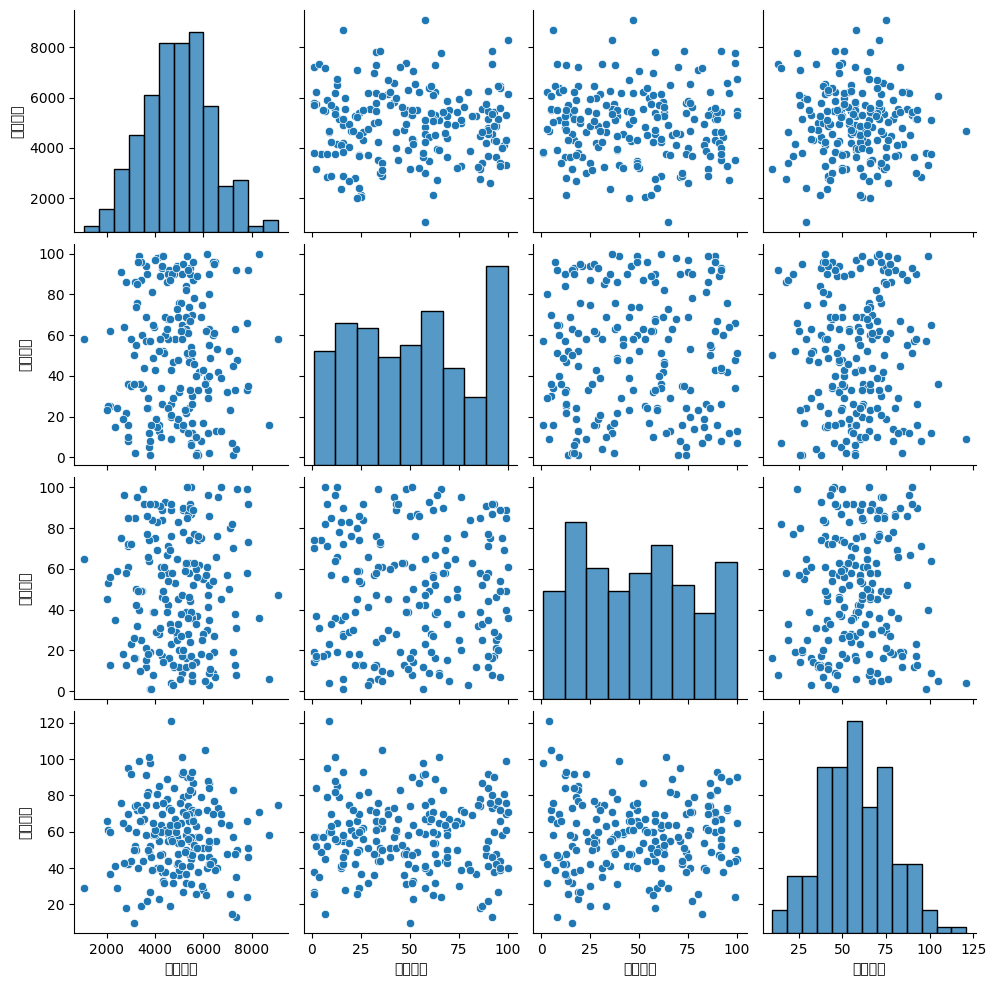

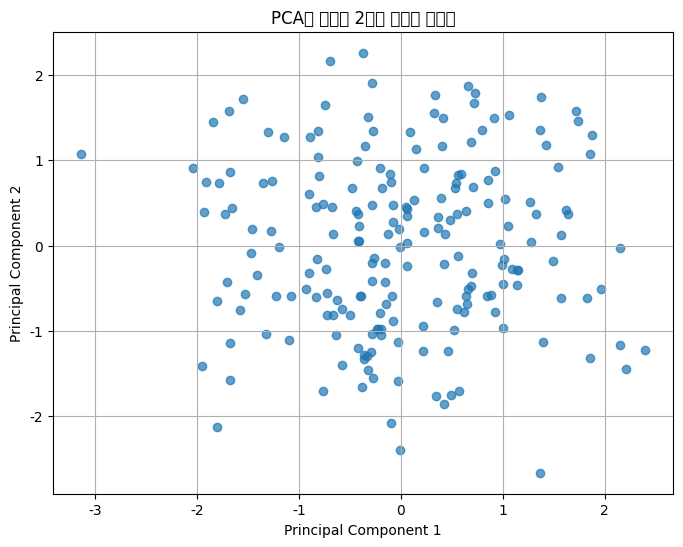

In [3]:
# 1. Pairplot으로 데이터 탐색
sns.pairplot(data)
plt.show()

# 2. 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. PCA 수행
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


# 4. PCA 결과 시각화
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA를 이용한 2차원 데이터 시각화')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# --- 해석 ---
# Pairplot과 PCA 산점도를 비교했을 때, 어떤 차이가 있나요? 왜 PCA가 유용한가요?
# 4개의 변수 조합을 모두 그려보았지만 → 명확하게 분리된 고객 그룹은 보이지 않음
#각 변수 쌍에서 데이터가 넓게 퍼져 있고 겹침이 심함
#고차원(4차원) 구조를 2차원 그래프 여러 개로 나눠서 보는 한계가 존재
#→ 변수 간 복합적인 관계를 직관적으로 파악하기 어려움

### 🤔 생각해 볼 문제:

1.  PCA를 통해 4차원 데이터가 2차원으로 축소되었습니다. 이 과정에서 정보의 손실이 발생했을까요? `pca.explained_variance_ratio_` 속성을 출력하고, PC1과 PC2가 전체 데이터 분산의 몇 %를 각각 설명하는지 확인해보세요. 두 주성분을 합치면 총 몇 %의 정보를 보존하고 있나요?
2.  만약 데이터 표준화(Scaling) 과정을 생략하고 PCA를 적용한다면 어떤 결과가 나올까요? '연간소득' 변수가 결과에 어떤 영향을 미칠지 예상해보세요.
3.  2차원으로 축소된 산점도를 보니, 데이터들이 몇 개의 덩어리(군집)로 나뉠 수 있을 것처럼 보이나요? 대략 몇 개의 그룹으로 나눌 수 있을지 예상해보세요.

---

### 📢 **[발표 과제]**

문제 1을 맡은 팀은 **데이터 전처리 및 PCA 기본 적용**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '차원의 저주'를 간단한 예시로 설명하고, 왜 PCA와 같은 차원 축소가 필요한지 설명합니다. PCA 전 데이터 스케일링의 중요성을 강조하세요.
2.  **코드 리뷰:** `StandardScaler`와 `PCA`를 사용하는 과정을 단계별로 설명합니다. Pairplot과 PCA 산점도 결과를 비교하며, PCA가 어떻게 복잡한 데이터를 한눈에 파악하기 쉽게 만드는지 보여줍니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 공유합니다. 특히 `explained_variance_ratio_`를 해석하는 방법을 통해, PCA가 '정보 손실'과 '데이터 요약' 사이의 트레이드오프 관계에 있음을 설명해 보세요.


In [4]:
#정보 손실 있었는지 확인
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[0.2604065  0.25428317]
0.5146896688778171


1. PCA 적용 시 정보 손실 여부

PCA를 통해 4차원 데이터를 2차원으로 축소하는 과정에서 일부 정보 손실이 발생한다.
이를 확인하기 위해 explained_variance_ratio_를 출력한 결과는 다음과 같다.

PC1: 약 26.04%

PC2: 약 25.43%

PC1 + PC2 합계: 약 51.47%

즉, 두 개의 주성분은 전체 데이터 분산의 약 **51.47%**를 설명하며,
나머지 약 **48.53%**의 정보는 차원 축소 과정에서 손실되었다.

2. 데이터 표준화를 생략할 경우의 영향

PCA는 변수의 스케일에 민감한 기법이다.
만약 표준화(Scaling) 과정을 생략하고 PCA를 적용한다면,
값의 범위가 가장 큰 변수인 연간소득이 전체 분산을 거의 독점하게 된다.

실제로 표준화 없이 PCA를 수행할 경우:

PC1이 전체 분산의 약 99.89%

PC2는 0.05% 미만

을 설명하게 되며, 이는 PCA 결과가 사실상 연간소득 하나만을 반영한 축이 됨을 의미한다.
따라서 표준화를 생략하면 PCA가 여러 변수를 종합적으로 요약하지 못하고,
특정 변수에 편향된 결과를 만들어 해석과 군집분석 결과를 왜곡할 가능성이 크다

3. PCA 산점도에서 관찰되는 군집 구조

2차원으로 축소된 PCA 산점도를 관찰한 결과,
데이터가 명확하게 분리된 여러 개의 군집으로 나뉜다고 단정하기는 어렵다.

다만, 데이터의 밀집 정도와 분포 형태를 고려할 때
2~4개 정도의 군집 후보는 직관적으로 예상할 수 있다.

그러나 이는 시각적 추정에 불과하기 때문에 실제 군집의 개수는 엘보우 방법과 같은 기준으로 정하는 것이 좋다.

## 문제 2 (난이도: 중): 주성분 의미 해석하기

> **🎯 목표:** PCA로 생성된 주성분(PC1, PC2)이 원래 변수들과 어떤 관계를 갖는지 분석하여, 각 주성분에 의미를 부여합니다.


### 💡 핵심 개념:

**주성분 부하량(Principal Component Loadings)**은 원래 변수와 주성분 간의 상관계수를 나타냅니다. 특정 변수의 부하량 절댓값이 크다면, 그 변수가 해당 주성분을 형성하는 데 중요한 역할을 한다는 의미입니다. `pca.components_` 속성을 통해 이 부하량을 확인할 수 있습니다. 이를 통해 우리는 'PC1은 소득과 관련된 축', 'PC2는 쇼핑 스타일과 관련된 축'과 같이 주성분의 의미를 해석할 수 있습니다.


### 📌 수행 과제:

1.  `pca.components_` 속성을 확인하여 주성분 부하량을 담은 데이터프레임을 생성합니다. (index는 'PC1', 'PC2', columns는 원래 변수명)
2.  `seaborn`의 `heatmap`을 이용해 부하량을 시각화하여 어떤 변수가 각 주성분에 큰 영향을 미치는지 한눈에 파악합니다.
3.  부하량 값을 바탕으로 PC1과 PC2가 각각 어떤 고객 특성을 대표하는지 해석해봅니다.


주성분 부하량:
         연간소득      소비점수      방문빈도      체류시간
PC1 -0.351970 -0.062222  0.629213  0.690172
PC2 -0.248209  0.859043  0.305294 -0.327463


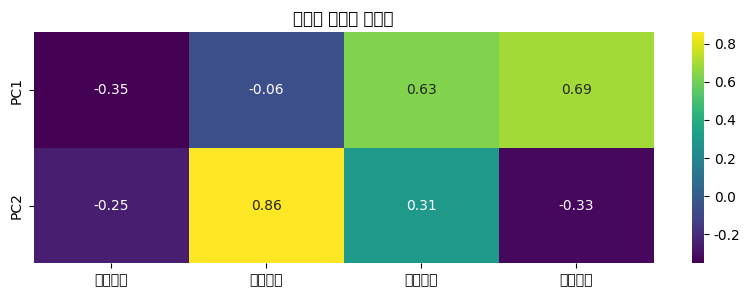

In [5]:
# 1. 주성분 부하량(Loadings) 확인
# TODO-1: pca.components_와 data.columns를 사용하여 부하량 데이터프레임(loadings_df)을 만드세요.
loadings_df = pd.DataFrame(
    data=pca.components_,
    columns=data.columns,
    index=['PC1', 'PC2']
)

print("주성분 부하량:")
print(loadings_df)


# 2. 히트맵으로 부하량 시각화
plt.figure(figsize=(10, 3))
sns.heatmap(loadings_df, annot=True, cmap='viridis', fmt='.2f')
plt.title('주성분 부하량 히트맵')
plt.show()


# 3. 주성분 해석 (아래 주석에 직접 작성해 보세요)
# PC1의 부하량을 보면, 연간소득과 체류시간의 절댓값이 상대적으로 크며
# 두 변수 모두 PC1 형성에 중요한 역할을 하고 있다.
# PC1이 높다는 것은 연간소득이 높고 쇼핑몰에 머무는 시간이 긴 고객으로,
# 전반적인 경제적 가치와 이용 규모가 큰 고객을 의미한다.
# PC1 의미 해석: 고객의 경제적 규모·가치 축

# PC2의 부하량을 보면, 소비점수와 방문빈도의 기여도가 상대적으로 크다.
# 이는 PC2가 고객의 쇼핑 행동 패턴과 활동성을 반영하는 축임을 의미한다.
# PC2가 높다는 것은 방문 빈도가 높고 소비 성향이 적극적인 고객을 의미한다.
# PC2 의미 해석: 쇼핑 행동·활동성 축


### 🤔 생각해 볼 문제:

1.  문제 1에서 그린 PCA 산점도에서 x축(PC1)의 오른쪽으로 갈수록, y축(PC2)의 위쪽으로 갈수록 어떤 특성을 가진 고객들이 위치할 것이라고 예상할 수 있나요? 여러분이 해석한 주성분의 의미와 연결지어 설명해보세요.
2.  '연간소득'과 '체류시간' 변수는 PC1에 미치는 영향(부하량의 부호)이 서로 비슷했나요, 달랐나요? 이는 두 변수 간에 어떤 관계가 있음을 시사할까요?
3.  만약 새로운 주성분 PC3를 추가로 분석한다면, PC3는 PC1이나 PC2가 설명하지 못한 데이터의 어떤 또 다른 특성을 잡아낼 것이라고 기대할 수 있을까요?

---

### 📢 **[발표 과제]**

문제 2를 맡은 팀은 **주성분 해석**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 주성분 부하량(Loadings)이 무엇인지, 그리고 이 값이 왜 주성분의 '정체'를 파악하는 데 핵심적인지 설명합니다.
2.  **코드 리뷰 및 결과 해석:** `pca.components_`를 데이터프레임과 히트맵으로 시각화하는 과정을 보여줍니다. 히트맵의 색상과 숫자를 보며 PC1과 PC2가 각각 어떤 원래 변수들과 강하게 연관되어 있는지, 그래서 각 축에 어떤 의미(예: '경제력 축', '쇼핑 열정 축')를 부여할 수 있는지 논리적으로 설명합니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 발표합니다. 특히 PCA 산점도의 각 사분면에 위치할 고객들의 페르소나를 추측해보며, 주성분 해석이 어떻게 데이터에 대한 깊이 있는 이해로 이어지는지 보여주세요.


문제 2 생각해 볼 문제 정리

1. PCA 산점도에서 PC1과 PC2 축의 방향에 따른 고객 특성 해석

PCA 산점도에서 x축인 PC1의 오른쪽으로 갈수록 PC1 값이 커진다는 의미이며,
이는 연간소득과 체류시간이 모두 높은 고객들이 위치할 가능성이 크다.
즉, 경제적 여유가 있고 쇼핑몰을 장시간 이용하는 고객일수록 PC1의 양의 방향에 분포할 것으로 예상된다.

y축인 PC2의 위쪽으로 갈수록 PC2 값이 커지며,
이는 소비점수와 방문빈도가 높은 고객들이 해당 영역에 위치할 것으로 해석할 수 있다.
따라서 PC2의 양의 방향에는 쇼핑몰 방문이 잦고 소비 성향이 적극적인 고객들이 분포할 가능성이 높다.

이를 종합하면,

PC1이 높고 PC2도 높은 영역에는 소득이 높고 활동성까지 높은 핵심 우수 고객이 위치할 가능성이 크고,

PC1은 낮지만 PC2가 높은 영역에는 소득은 낮지만 방문과 소비가 활발한 충성 고객,

PC1은 높고 PC2가 낮은 영역에는 구매력은 있으나 쇼핑 활동은 상대적으로 적은 고객이 위치할 것으로 추정할 수 있다.

2. 연간소득과 체류시간의 PC1 부하량 부호 해석

연간소득과 체류시간 변수는 PC1에서 부하량의 부호가 서로 유사하게 나타났다.
이는 두 변수가 PC1에 같은 방향으로 기여하고 있음을 의미한다.

이러한 결과는 연간소득이 높은 고객일수록 쇼핑몰에 머무는 시간이 길어지는 경향이 있을 수 있음을 시사한다.
즉, 두 변수 간에는 일정 수준의 양의 관계가 존재할 가능성이 있으며,
PC1은 이러한 공통적인 특성을 묶어 고객의 전반적인 이용 규모와 경제적 가치를 요약한 축으로 해석할 수 있다.

3. PC3가 설명할 수 있는 추가적인 특성에 대한 기대

PC3는 PC1과 PC2가 설명하지 못한 나머지 분산을 설명하는 주성분이다.
따라서 PC3에서는 경제적 규모나 전반적인 쇼핑 활동성과는 다른 특성이 드러날 가능성이 있다.

예를 들어,

소득 대비 소비 성향의 차이,

방문 빈도는 낮지만 한 번 방문 시 소비가 큰 고객,

체류시간은 짧지만 소비점수가 높은 효율적 구매 패턴

과 같은 보다 미세한 행동 차이를 포착할 수 있을 것으로 기대된다.

즉, PC3는 주요 축에서 드러나지 않은 고객 행동의 세부적인 패턴이나 예외적인 특성을 보완적으로 설명하는 역할을 할 수 있다.

## 문제 3 (난이도: 상): K-평균 군집분석으로 고객 그룹 찾기

> **🎯 목표:** K-평균 군집분석을 PCA로 차원 축소된 데이터에 적용하여 고객들을 자동으로 그룹화하고, 엘보우 방법을 이용해 최적의 군집 개수(k)를 결정합니다.


### 💡 핵심 개념:

K-평균 알고리즘을 사용하려면 '몇 개의 군집으로 나눌지(k)'를 미리 정해야 합니다. **엘보우 방법(Elbow Method)**은 k를 1부터 점차 늘려가며 각 k에 대한 군집 결과를 평가하는 방법입니다. 평가 지표로는 군집 내 데이터들이 중심에 얼마나 잘 뭉쳐있는지를 나타내는 **이너셔(Inertia)** 값을 사용합니다. k가 증가할수록 이너셔는 계속 감소하는데, 이 감소율이 급격히 완만해지는 지점(그래프 모양이 팔꿈치처럼 꺾이는 부분)을 최적의 k로 선택합니다.


### 📌 수행 과제:

1.  k를 1부터 10까지 변화시키면서 K-평균 군집분석을 반복 수행하고, 각 k에 대한 이너셔(`kmeans.inertia_`) 값을 리스트에 저장합니다.
2.  저장된 이너셔 값을 꺾은선 그래프로 시각화하여 '팔꿈치'에 해당하는 최적의 k를 찾습니다.
3.  찾아낸 최적의 k를 사용하여 K-평균 모델을 다시 학습시키고, 각 데이터 포인트에 대한 군집 레이블을 얻습니다.
4.  PCA 산점도에 군집 레이블에 따라 다른 색상을 적용하여 군집화 결과를 시각화합니다.


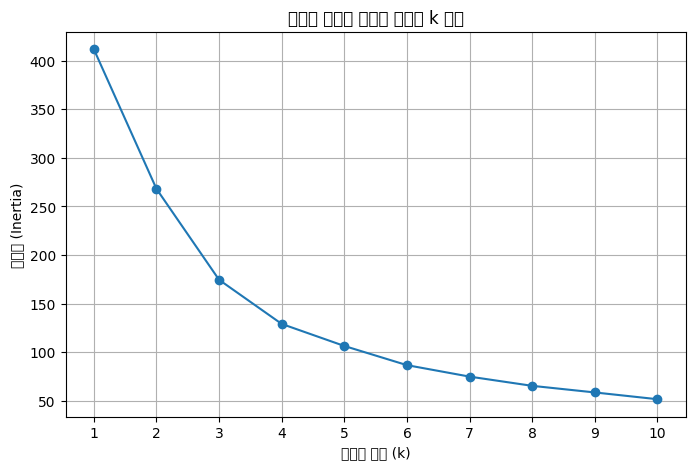

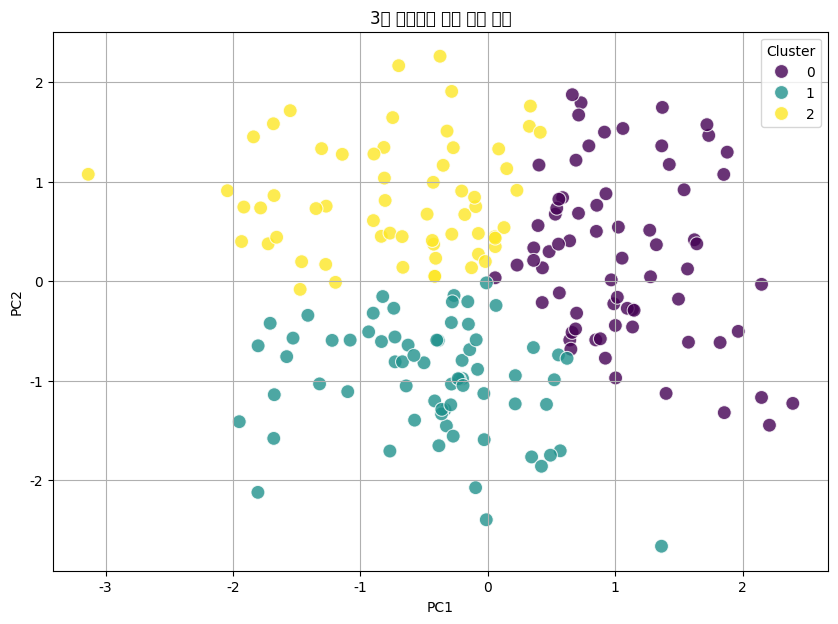

In [6]:
# 1. 엘보우 방법을 위한 이너셔(Inertia) 계산
inertia_list = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_data)
    inertia_list.append(kmeans.inertia_)
# 2. 엘보우 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_list, marker='o')
plt.title('엘보우 방법을 이용한 최적의 k 찾기')
plt.xlabel('군집의 개수 (k)')
plt.ylabel('이너셔 (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# 3. 최적의 k로 K-Means 다시 실행
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_data)

# 4. 군집화 결과 시각화
pca_df['cluster'] = cluster_labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title(f'{optimal_k}개 군집으로 나눈 고객 분포')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

이 실습 데이터(랜덤 생성, seed=42) 기준으로 이너셔 감소폭이 k=3 전후에서 크게 줄어드는 형태가 나타나며, 최적 k를 3으로 두는 선택이 합리적이다. 시각적으로 k=3 또는 k=4가 후보가 될 수 있으나, 감소율이 급격히 완만해지는 최초 구간을 기준으로 3을 선택했다.

### 🤔 생각해 볼 문제:

1.  엘보우 그래프에서 왜 '팔꿈치' 지점이 최적의 k가 되는 것일까요? k를 그보다 더 크게 설정하면 어떤 장단점이 있을까요?
2.  군집분석을 원본 데이터(4차원)가 아닌 PCA 데이터(2차원)에 적용했습니다. 이렇게 하는 것의 장점은 무엇일까요? 만약 원본 데이터에 직접 K-평균을 적용했다면 결과가 어떻게 달라졌을지 예상해보세요.
3.  시각화된 군집 결과를 보면, 군집들이 잘 나뉘었다고 생각하나요? 경계가 모호한 데이터 포인트들은 왜 그렇게 분류되었을지, PCA 산점도와 연관지어 생각해보세요.

---

### 📢 **[발표 과제]**

문제 3을 맡은 팀은 **K-평균 군집분석**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** K-평균 알고리즘의 동작 원리를 간단한 그림이나 비유로 설명합니다. '최적의 k'를 찾는 것이 왜 중요한 문제인지, 그리고 엘보우 방법이 어떻게 그 해답을 주는지 이너셔(Inertia) 개념과 함께 설명하세요.
2.  **코드 리뷰:** 엘보우 그래프를 그리기 위한 for문 코드와, 최적의 k를 결정한 후 군집 결과를 시각화하는 과정을 단계별로 설명합니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 발표합니다. 특히 PCA 데이터에 군집분석을 적용하는 이유(계산 효율성, 노이즈 감소, 시각화 용이성 등)를 명확히 설명하고, 이것이 분석의 질을 어떻게 높이는지 청중을 설득해 보세요.


1.엘보우 지점이 최적의 k가 되는 이유

군집 수 k가 증가할수록 이너셔는 감소하지만, 일정 지점 이후에는 감소 폭이 급격히 줄어든다.
이 감소율이 완만해지는 지점은 군집을 더 늘려도 성능 개선 효과가 크지 않다는 의미이므로,
과도한 분할을 피하면서도 군집 응집도를 충분히 확보할 수 있는 최적의 k로 판단된다.

2.PCA 데이터에 군집분석을 적용한 장점

PCA를 적용하면 주요 분산 방향만 남겨 데이터가 요약되므로,
거리 기반인 K-평균에서 노이즈의 영향을 줄이고 계산 효율을 높일 수 있다.
또한 2차원 공간에서 군집 결과를 직접 시각화할 수 있어 해석이 용이하다.

군집 경계가 모호한 이유

3.PCA 산점도에서 데이터가 연속적으로 분포하면 군집 간 명확한 경계가 형성되기 어렵다.
K-평균은 거리 기준으로 군집을 나누기 때문에, 군집 중심 사이에 위치한 데이터는
작은 거리 차이로 인해 경계가 불분명하게 분류될 수 있다.

핵심 개념

K-평균은 데이터를 k개의 중심점으로 나누고, 각 데이터가 가장 가까운 중심에 속하도록 반복적으로 조정하는 군집 알고리즘이다.
k가 너무 작으면 서로 다른 고객이 섞이고, 너무 크면 의미 없는 군집이 생기므로 적절한 k 선택이 중요하다.
엘보우 방법은 k를 늘릴수록 감소하는 이너셔의 변화 폭이 급격히 줄어드는 지점을 찾아 최적의 k를 결정하는 방법이다.

코드 흐름

k를 1부터 10까지 바꾸며 K-평균을 반복 실행하고 각 k의 이너셔를 저장한다.
이너셔를 그래프로 시각화해 팔꿈치 지점을 확인한다.
선택한 k로 다시 학습한 뒤 PCA 산점도에 군집 결과를 색으로 표현한다.

생각해 볼 문제 요약

엘보우 지점 이후에는 군집 수를 늘려도 성능 개선 효과가 작다.
PCA 데이터를 사용하면 노이즈가 줄고 계산과 시각화가 쉬워진다.
군집 경계가 모호한 이유는 데이터가 연속적으로 분포하고 K-평균이 거리 기준으로 분류하기 때문이다.

## 문제 4 (난이도: 중): 고객 세그먼트 분석 및 전략 수립

> **🎯 목표:** 군집분석으로 얻은 그룹별 특성을 원본 데이터와 비교하여 분석하고, 각 그룹에 대한 페르소나를 정의하여 실제 비즈니스에 적용할 마케팅 아이디어를 도출합니다.


### 💡 핵심 개념:

분석의 최종 목표는 '인사이트 발견'과 '액션 제안'입니다. 군집분석으로 얻은 레이블(0, 1, 2...)은 그 자체로는 의미가 없습니다. 이 레이블을 원본 데이터프레임에 다시 붙인 후, 각 그룹이 원본 변수(소득, 소비점수 등)에서 어떤 평균적인 특징을 보이는지 분석해야 비로소 각 그룹의 정체를 파악하고, 'VIP 고객', '잠재 고객', '이탈 위험 고객' 등과 같은 의미 있는 이름을 붙여줄 수 있습니다.


### 📌 수행 과제:

1.  원본 `data` 데이터프레임에 군집 레이블(`cluster_labels`)을 새로운 컬럼으로 추가합니다.
2.  `groupby('cluster')`와 `.mean()`을 사용하여 각 군집별로 4개 원본 변수의 평균값을 계산합니다.
3.  계산된 평균값을 보고 각 군집의 특징을 해석하고, 각 군집에 어울리는 이름(페르소나)을 붙여봅니다. (예: '알뜰 쇼핑족', '쇼핑 중독 VIP' 등)
4.  각 고객 그룹의 특성에 맞는 마케팅 전략을 아이디어 차원에서 제안해봅니다.


In [8]:
# 1. 원본 데이터에 군집 레이블 추가
# TODO-1: 원본 데이터프레임 'data'에 'cluster'라는 새로운 컬럼을 만들고, cluster_labels 값을 할당하세요.
# 1. 원본 데이터에 군집 레이블 추가
data['cluster'] = cluster_labels


# 2. 군집별 특성 분석
cluster_summary = data.groupby('cluster').mean()

print("군집별 평균 특성:")
print(cluster_summary)


# 3. 군집별 페르소나 정의 및 전략 수립 (아래 주석에 직접 작성해 보세요)
# Cluster 0: 어떤 특성을 가졌나요? (예: 소득은 높지만 소비는 낮은...)
#   - 페르소나:
#   - 마케팅 전략:

# Cluster 1: 어떤 특성을 가졌나요?
#   - 페르소나:
#   - 마케팅 전략:

# Cluster 2: 어떤 특성을 가졌나요?
#   - 페르소나:
#   - 마케팅 전략:

# (군집 개수에 따라 아래 내용을 채우세요)

군집별 평균 특성:
                연간소득       소비점수       방문빈도       체류시간     
cluster                                                   
0        4357.914286  52.785714  73.000000  68.814286  0.0
1        5478.362319  27.000000  30.536232  59.101449  1.0
2        4993.491803  74.688525  40.475410  43.967213  2.0


### 🤔 생각해 볼 문제:

1.  이번 분석(PCA + K-Means)을 통해 얻은 가장 중요한 비즈니스 인사이트는 무엇이라고 생각하나요? 만약 이 분석을 하지 않았다면 어떤 점을 놓쳤을까요?
2.  K-평균 군집분석은 항상 원형의 군집을 잘 찾아내는 경향이 있습니다. 만약 데이터가 길쭉하거나 특이한 모양으로 분포해 있다면 K-평균이 적합하지 않을 수 있습니다. 이런 경우 어떤 다른 군집분석 방법을 고려해볼 수 있을까요? (힌트: `DBSCAN`, `Hierarchical Clustering`)
3.  이번 분석은 고객을 몇 개의 뚜렷한 그룹으로 나누었습니다. 하지만 실제 고객의 특성은 이렇게 칼로 자르듯 나뉘지 않을 수 있습니다. 이러한 '그룹화' 모델링의 장점과 현실 세계에 적용할 때의 잠재적 한계는 무엇일까요?

---

### 📢 **[발표 과제]**

문제 4를 맡은 팀은 **인사이트 도출 및 비즈니스 적용**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 데이터 분석의 최종 목표가 '보고서 작성'이 아닌 '실질적 가치 창출'에 있음을 강조합니다. 군집 레이블을 다시 원본 데이터와 결합하여 해석하는 과정의 중요성을 설명하세요.
2.  **코드 리뷰 및 결과 해석:** `groupby().mean()` 코드의 의미를 설명하고, 출력된 요약 통계표를 어떻게 해석하여 각 군집의 특징을 잡아냈는지 상세히 보여줍니다. 각 군집에 붙인 창의적인 페르소나와 그 근거를 발표하세요.
3.  **종합 결론 및 토의:** 각 페르소나에 맞춰 제안한 마케팅 전략을 발표하며, 어떻게 데이터 분석 결과가 구체적인 비즈니스 액션으로 이어질 수 있는지 보여줍니다. '생각해 볼 문제' 토의를 통해, 이번 프로젝트 전체를 되돌아보고 데이터 기반 의사결정의 가치와 잠재적 한계에 대해 논의하며 전체 실습을 마무리하세요.


1. 핵심 개념 설명

데이터 분석의 최종 목적은 단순한 결과 보고가 아니라, 실질적인 비즈니스 가치 창출에 있다.
군집분석에서 생성된 레이블은 그 자체로 의미가 없으며, 이를 원본 데이터와 다시 결합하여 각 군집이 어떤 평균적 특성을 가지는지 해석하는 과정이 중요하다. 이 과정을 통해 고객 그룹의 성격을 정의하고, 실제 의사결정에 활용할 수 있는 인사이트를 도출할 수 있다.

2. 코드 리뷰 및 결과 해석

groupby('cluster').mean() 코드는 같은 군집에 속한 고객들을 묶어 각 변수의 평균값을 계산함으로써, 군집을 대표하는 고객 특성을 요약한다.

분석 결과,

Cluster 0은 방문빈도와 체류시간이 높아 충성도가 높은 고객군으로 해석되었다.

Cluster 1은 소득은 높지만 소비와 방문빈도가 낮아 이탈 가능성이 있는 고객군으로 판단되었다.

Cluster 2는 소비점수가 높고 체류시간이 짧아 빠른 구매를 선호하는 목적형 소비 고객군으로 해석되었다.

이를 바탕으로 각 군집에 의미 있는 페르소나를 부여하였다

3. 종합 결론 및 비즈니스 적용

군집별 특성에 따라 차별화된 마케팅 전략을 수립할 수 있다.
충성 고객군에는 멤버십과 리텐션 전략을, 이탈 위험 고객군에는 개인화 혜택을 통한 재방문 유도를, 고소비 고객군에는 간편 구매 환경과 고가 상품 추천 전략을 적용할 수 있다.

이번 분석은 데이터 결과가 구체적인 비즈니스 액션으로 연결될 수 있음을 보여주며, 데이터 기반 의사결정의 중요성과 함께 변수 선택 및 해석에 대한 한계 또한 함께 고려해야 함을 시사한다.